0        0.041216
1       -0.173455
2       -0.118720
3       -0.230641
4       -0.029631
           ...   
62828   -0.399521
62829    1.812248
62830   -0.383569
62831   -0.212517
62832    1.879225
Name: b_factor, Length: 62833, dtype: float64
    PDB  resi resn chain   b_factor  num_altlocs   Z_score
0  16gs     2  PRO     A  22.030000            1  0.041216
1  16gs     3  TYR     A  19.424167            1 -0.173455
2  16gs     4  THR     A  20.088571            1 -0.118720
3  16gs     5  VAL     A  18.730000            1 -0.230641
4  16gs     6  VAL     A  21.170000            1 -0.029631
       PDB  resi   resn chain   b_factor  num_altlocs Cleaned Base Name  \
0     16gs     7  'TYR'     A  21.450000            1              16gs   
1     16gs     8  'PHE'     A  26.199091            1              16gs   
2     16gs    10  'VAL'     A  20.841429            1              16gs   
3     16gs    12  'GLY'     A  18.297500            1              16gs   
4     16gs    13  'ARG'    

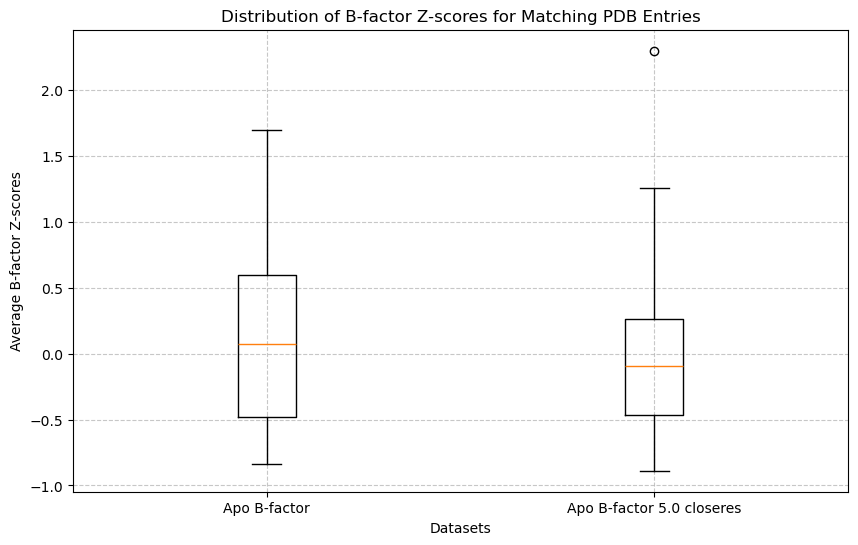

Mann-Whitney U statistic: 5930.0
P-value: 0.2295415638450241

Sample size for bfactor_apo: 104
Sample size for bfactor_apo_5: 104

Descriptive Statistics:

bfactor_apo:
count    104.000000
mean       0.083352
std        0.629219
min       -0.840250
25%       -0.477031
50%        0.075710
75%        0.597276
max        1.694259
Name: avg_bfactor_df1, dtype: float64

bfactor_apo_5:
count    104.000000
mean      -0.026662
std        0.563695
min       -0.888088
25%       -0.462092
50%       -0.094726
75%        0.263632
max        2.298095
Name: avg_bfactor_df2, dtype: float64


In [11]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

binding_site = pd.read_csv('/Users/harrw10/OneDrive - Vanderbilt/Documents/Vanderbilt/Stephanie Wankowicz research/combined_full_protein_data/apo_b_factor_aligned.csv')
zscores = stats.zscore(binding_site['b_factor'])
print(zscores)
binding_site['Z_score'] = zscores
print(binding_site.head())
binding_site.to_csv('/Users/harrw10/OneDrive - Vanderbilt/Documents/Vanderbilt/Stephanie Wankowicz research/combined_full_protein_data/apo_b_factor_aligned_update.csv', index=False)


# Load both datasets
full_dataset = pd.read_csv('/Users/harrw10/OneDrive - Vanderbilt/Documents/Vanderbilt/Stephanie Wankowicz research/combined_full_protein_data/apo_b_factor_aligned_update.csv')
subset_data = pd.read_csv('/Users/harrw10/OneDrive - Vanderbilt/Documents/Vanderbilt/Stephanie Wankowicz research/combined_full_protein_data/apo_5_bfactor_subset_aligned.csv')

# Calculate mean and std from the full dataset
mean_bfactor = full_dataset['b_factor'].mean()
std_bfactor = full_dataset['b_factor'].std()

# Calculate z-scores for the subset using the full dataset's parameters
subset_data['Z_score'] = (subset_data['b_factor'] - mean_bfactor) / std_bfactor
subset_data['Z_score'] = zscores
print(subset_data)
subset_data.to_csv('/Users/harrw10/OneDrive - Vanderbilt/Documents/Vanderbilt/Stephanie Wankowicz research/combined_full_protein_data/apo_5_bfactor_aligned_update.csv', index=False)

df1 = pd.read_csv('/Users/harrw10/OneDrive - Vanderbilt/Documents/Vanderbilt/Stephanie Wankowicz research/combined_full_protein_data/apo_bfactor_aligned_update.csv')
df2 = pd.read_csv('/Users/harrw10/OneDrive - Vanderbilt/Documents/Vanderbilt/Stephanie Wankowicz research/combined_full_protein_data/apo_5_bfactor_aligned_update.csv')

# Create empty summary dataframe with separate columns
summary_df = pd.DataFrame(columns=['PDB', 'avg_bfactor_df1', 'avg_bfactor_df2'])

# Process df1
df1_summary = {}
for i in df1['PDB'].unique():
    tmp = df1[df1['PDB'] == i]
    df1_summary[i] = tmp['Z_score'].mean()

# Process df2
df2_summary = {}
for i in df2['PDB'].unique():
    tmp = df2[df2['PDB'] == i]
    df2_summary[i] = tmp['Z_score'].mean()

# Create final summary DataFrame
all_pdbs = list(set(list(df1_summary.keys()) + list(df2_summary.keys())))
summary_data = []

for pdb in all_pdbs:
    row = {
        'PDB': pdb,
        'avg_bfactor_df1': df1_summary.get(pdb, None),
        'avg_bfactor_df2': df2_summary.get(pdb, None)
    }
    # Calculate delta between df1 and df2 averages
    if row['avg_bfactor_df1'] is not None and row['avg_bfactor_df2'] is not None:
        row['delta_bfactor'] = row['avg_bfactor_df1'] - row['avg_bfactor_df2']
    else:
        row['delta_bfactor'] = None
    
    summary_data.append(row)

summary_df = pd.DataFrame(summary_data)

# Save results with new delta column
summary_df.to_csv('/Users/harrw10/OneDrive - Vanderbilt/Documents/Vanderbilt/Stephanie Wankowicz research/combined_full_protein_data/apo_pdb_bfactor_zs_summary.csv', index=False)
# Filter for PDbs that exist in both datasets
matching_pdbs = summary_df.dropna(subset=['avg_bfactor_df1', 'avg_bfactor_df2'])

# Create figure
plt.figure(figsize=(10, 6))

# Create box plot
data = [matching_pdbs['avg_bfactor_df1'], matching_pdbs['avg_bfactor_df2']]
plt.boxplot(data, labels=['Apo B-factor', 'Apo B-factor 5.0 closeres'])

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Customize plot
plt.xlabel('Datasets')
plt.ylabel('Average B-factor Z-scores')
plt.title('Distribution of B-factor Z-scores for Matching PDB Entries')
# Save first
plt.savefig('/Users/harrw10/OneDrive - Vanderbilt/Documents/Vanderbilt/Stephanie Wankowicz research/combined_full_protein_data/comparison_bfactor_boxplot.png', dpi=300, bbox_inches='tight')

plt.show()

# Read the CSV file
df = pd.read_csv('/Users/harrw10/OneDrive - Vanderbilt/Documents/Vanderbilt/Stephanie Wankowicz research/combined_full_protein_data/apo_pdb_bfactor_zs_summary.csv')

df = df.drop(columns=['delta_bfactor'])
# Filter rows where both b-factor columns have values (not null)
filtered_df = df.dropna(subset=['avg_bfactor_df1', 'avg_bfactor_df2'])

# Save the filtered data to a new CSV
filtered_df.to_csv('/Users/harrw10/OneDrive - Vanderbilt/Documents/Vanderbilt/Stephanie Wankowicz research/combined_full_protein_data/filtered_apo_pdb_bfactor_zs_summary.csv', index=False)

# Read your data
df = pd.read_csv('/Users/harrw10/OneDrive - Vanderbilt/Documents/Vanderbilt/Stephanie Wankowicz research/combined_full_protein_data/filtered_apo_pdb_bfactor_zs_summary.csv')

# Perform Mann-Whitney U test
statistic, p_value = mannwhitneyu(df['avg_bfactor_df1'], 
                                df['avg_bfactor_df2'], 
                                alternative='two-sided')

# Print the results
print(f"Mann-Whitney U statistic: {statistic}")
print(f"P-value: {p_value}")

# Optional: Print sample sizes for verification
print(f"\nSample size for bfactor_apo: {len(df['avg_bfactor_df1'])}")
print(f"Sample size for bfactor_apo_5: {len(df['avg_bfactor_df2'])}")

# Optional: Print descriptive statistics
print("\nDescriptive Statistics:")
print("\nbfactor_apo:")
print(df['avg_bfactor_df1'].describe())
print("\nbfactor_apo_5:")
print(df['avg_bfactor_df2'].describe())

0        0.380428
1       -0.582937
2       -0.670828
3       -0.563223
4       -0.816662
           ...   
68705    0.240358
68706   -0.018741
68707    0.029749
68708    0.284329
68709    1.403710
Name: b_factor, Length: 68710, dtype: float64
    PDB  resi resn chain   b_factor  num_altlocs   Z_score
0  19gs     2  PRO     A  28.164286            1  0.380428
1  19gs     3  TYR     A  14.952500            1 -0.582937
2  19gs     4  THR     A  13.747143            1 -0.670828
3  19gs     5  VAL     A  15.222857            1 -0.563223
4  19gs     6  VAL     A  11.747143            1 -0.816662
       PDB  resi   resn chain   b_factor  num_altlocs Cleaned Base Name  \
0     19gs     7  'TYR'     A  11.735833            1              19gs   
1     19gs     8  'PHE'     A  19.983636            1              19gs   
2     19gs     9  'PRO'     A  15.191429            1              19gs   
3     19gs    10  'VAL'     A  15.797143            1              19gs   
4     19gs    13  'ARG'    

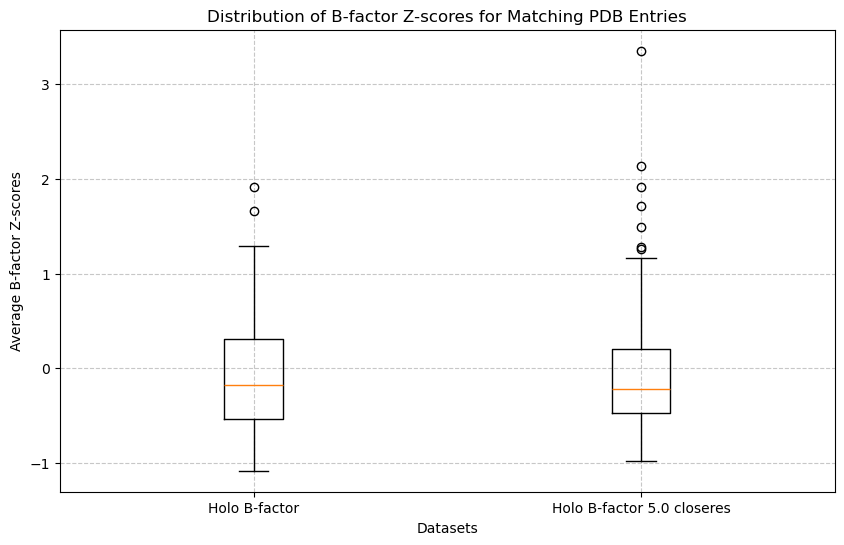

Mann-Whitney U statistic: 14956.0
P-value: 0.8466286891728376

Sample size for bfactor_apo: 174
Sample size for bfactor_apo_5: 174

Descriptive Statistics:

bfactor_holo:
count    174.000000
mean      -0.064701
std        0.622827
min       -1.081611
25%       -0.539337
50%       -0.172327
75%        0.313844
max        1.918755
Name: avg_bfactor_df1, dtype: float64

bfactor_holo_5:
count    174.000000
mean      -0.057709
std        0.613632
min       -0.973781
25%       -0.472726
50%       -0.215510
75%        0.208738
max        3.353173
Name: avg_bfactor_df2, dtype: float64


In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
from scipy.stats import mannwhitneyu

binding_site = pd.read_csv('/Users/harrw10/OneDrive - Vanderbilt/Documents/Vanderbilt/Stephanie Wankowicz research/combined_full_protein_data/holo_b_factor_aligned.csv')
zscores = stats.zscore(binding_site['b_factor'])
print(zscores)
binding_site['Z_score'] = zscores
print(binding_site.head())
binding_site.to_csv('/Users/harrw10/OneDrive - Vanderbilt/Documents/Vanderbilt/Stephanie Wankowicz research/combined_full_protein_data/holo_b_factor_aligned_update.csv', index=False)
# Load both datasets
full_dataset = pd.read_csv('/Users/harrw10/OneDrive - Vanderbilt/Documents/Vanderbilt/Stephanie Wankowicz research/combined_full_protein_data/holo_b_factor_aligned_update.csv')
subset_data = pd.read_csv('/Users/harrw10/OneDrive - Vanderbilt/Documents/Vanderbilt/Stephanie Wankowicz research/combined_full_protein_data/holo_5_bfactor_subset_aligned.csv')

# Calculate mean and std from the full dataset
mean_bfactor = full_dataset['b_factor'].mean()
std_bfactor = full_dataset['b_factor'].std()

# Calculate z-scores for the subset using the full dataset's parameters
subset_data['Z_score'] = (subset_data['b_factor'] - mean_bfactor) / std_bfactor
subset_data['Z_score'] = zscores
print(subset_data)
subset_data.to_csv('/Users/harrw10/OneDrive - Vanderbilt/Documents/Vanderbilt/Stephanie Wankowicz research/combined_full_protein_data/holo_5_bfactor_aligned_update.csv', index=False)

df1 = pd.read_csv('/Users/harrw10/OneDrive - Vanderbilt/Documents/Vanderbilt/Stephanie Wankowicz research/combined_full_protein_data/holo_b_factor_aligned_update.csv')
df2 = pd.read_csv('/Users/harrw10/OneDrive - Vanderbilt/Documents/Vanderbilt/Stephanie Wankowicz research/combined_full_protein_data/holo_5_bfactor_aligned_update.csv')

# Create empty summary dataframe with separate columns
summary_df = pd.DataFrame(columns=['PDB', 'avg_bfactor_df1', 'avg_bfactor_df2'])

# Process df1
df1_summary = {}
for i in df1['PDB'].unique():
    tmp = df1[df1['PDB'] == i]
    df1_summary[i] = tmp['Z_score'].mean()

# Process df2
df2_summary = {}
for i in df2['PDB'].unique():
    tmp = df2[df2['PDB'] == i]
    df2_summary[i] = tmp['Z_score'].mean()

# Create final summary DataFrame
all_pdbs = list(set(list(df1_summary.keys()) + list(df2_summary.keys())))
summary_data = []

for pdb in all_pdbs:
    row = {
        'PDB': pdb,
        'avg_bfactor_df1': df1_summary.get(pdb, None),
        'avg_bfactor_df2': df2_summary.get(pdb, None)
    }
    # Calculate delta between df1 and df2 averages
    if row['avg_bfactor_df1'] is not None and row['avg_bfactor_df2'] is not None:
        row['delta_bfactor'] = row['avg_bfactor_df1'] - row['avg_bfactor_df2']
    else:
        row['delta_bfactor'] = None
    
    summary_data.append(row)

summary_df = pd.DataFrame(summary_data)

# Save results with new delta column
summary_df.to_csv('/Users/harrw10/OneDrive - Vanderbilt/Documents/Vanderbilt/Stephanie Wankowicz research/combined_full_protein_data/holo_pdb_bfactor_zs_summary_111924.csv', index=False)
# Filter for PDbs that exist in both datasets
matching_pdbs = summary_df.dropna(subset=['avg_bfactor_df1', 'avg_bfactor_df2'])

# Create figure
plt.figure(figsize=(10, 6))

# Create box plot
data = [matching_pdbs['avg_bfactor_df1'], matching_pdbs['avg_bfactor_df2']]
plt.boxplot(data, labels=['Holo B-factor', 'Holo B-factor 5.0 closeres'])

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Customize plot
plt.xlabel('Datasets')
plt.ylabel('Average B-factor Z-scores')
plt.title('Distribution of B-factor Z-scores for Matching PDB Entries')
# Save first
plt.savefig('/Users/harrw10/OneDrive - Vanderbilt/Documents/Vanderbilt/Stephanie Wankowicz research/combined_full_protein_data/comparison_holo_bfactor_boxplot_111924.png', dpi=300, bbox_inches='tight')

plt.show()
# Read the CSV file
df = pd.read_csv('/Users/harrw10/OneDrive - Vanderbilt/Documents/Vanderbilt/Stephanie Wankowicz research/combined_full_protein_data/holo_pdb_bfactor_zs_summary.csv')

df = df.drop(columns=['delta_bfactor'])
# Filter rows where both b-factor columns have values (not null)
filtered_df = df.dropna(subset=['avg_bfactor_df1', 'avg_bfactor_df2'])

# Save the filtered data to a new CSV
filtered_df.to_csv('/Users/harrw10/OneDrive - Vanderbilt/Documents/Vanderbilt/Stephanie Wankowicz research/combined_full_protein_data/filtered_holo_pdb_bfactor_zs_summary.csv', index=False)

# Read your data
df = pd.read_csv('/Users/harrw10/OneDrive - Vanderbilt/Documents/Vanderbilt/Stephanie Wankowicz research/combined_full_protein_data/filtered_holo_pdb_bfactor_zs_summary.csv')

# Perform Mann-Whitney U test
statistic, p_value = mannwhitneyu(df['avg_bfactor_df1'], 
                                df['avg_bfactor_df2'], 
                                alternative='two-sided')

# Print the results
print(f"Mann-Whitney U statistic: {statistic}")
print(f"P-value: {p_value}")

# Optional: Print sample sizes for verification
print(f"\nSample size for bfactor_apo: {len(df['avg_bfactor_df1'])}")
print(f"Sample size for bfactor_apo_5: {len(df['avg_bfactor_df2'])}")

# Optional: Print descriptive statistics
print("\nDescriptive Statistics:")
print("\nbfactor_holo:")
print(df['avg_bfactor_df1'].describe())
print("\nbfactor_holo_5:")
print(df['avg_bfactor_df2'].describe())
